In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os
import datetime as dt
import re

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import ResidualsPlot

In [2]:
# import wiki_nlp and clean
wiki_nlp = pd.read_csv('../NLP/wiki_nlp.csv')
wiki_nlp = wiki_nlp.rename(columns={'this_article_unique_name': 'article_name'})
wiki_nlp.set_index('article_name', inplace=True) #set article name as index
wiki_nlp.fillna(value = 0, inplace=True)
wiki_nlp = wiki_nlp.reset_index()
wiki_nlp.drop(columns=['level_0','Unnamed: 0'], inplace=True, errors='ignore')

In [3]:
# import target (num of lang) from ExtractClean
wiki_feat = pd.read_csv('../ExtractClean/wiki_10feat.csv')
wiki_lang = wiki_feat[['article_name','languages']]
wiki_lang = wiki_lang.rename(columns={'languages': 'lang_total_num_target'})

# join two dataframes
wiki_nlp_comb = wiki_lang.merge(wiki_nlp, left_on='article_name', right_on='article_name')

In [4]:
wiki_nlp_comb = wiki_nlp_comb.reset_index()
wiki_nlp_comb.set_index('article_name', inplace=True) #set article name as index
wiki_nlp_comb.drop(['1858', 'Ice','Dysprosium','Eucalyptus','.uy','2000s in music'], inplace=True, errors='ignore') #outliers 

In [5]:
#normalize all features except languages

# normalized_wiki_nlp = (wiki_nlp_comb - wiki_nlp_comb.min()) / (wiki_nlp_comb.max()-wiki_nlp_comb.min())
normalized_wiki_nlp = (wiki_nlp_comb - wiki_nlp_comb.mean()) / wiki_nlp_comb.std()
normalized_wiki_nlp['lang_total_num_target'] = wiki_nlp_comb['lang_total_num_target']

In [6]:
normalized_wiki_nlp.drop(columns=['level_0'], inplace=True, errors='ignore')
normalized_wiki_nlp.sort_values(by='lang_total_num_target',ascending=False).head(10)

,lang_total_num_target,aurelio,padovani,february,june,fascist,war,mussolini,naples,fascism,...,rosson,jorasanko,taltala,calcutta,kmc,bahrenborstel,diepholz,redmond,biologist,obe
article_name,,,,,,,,,,,,,,,,,,,,,
Lubusz Voivodeship,75,-0.016591,-0.016591,-0.097208,-0.174928,-0.027386,-0.102447,-0.023285,-0.050355,-0.023466,...,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591
Jeans,73,-0.016591,-0.016591,0.745986,0.701039,-0.027386,-0.102447,-0.023285,-0.050355,-0.023466,...,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591
Gamete,69,-0.016591,-0.016591,-0.097208,-0.174928,-0.027386,-0.102447,-0.023285,-0.050355,-0.023466,...,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591
Temple in Jerusalem,66,-0.016591,-0.016591,-0.097208,0.701039,-0.027386,0.752667,-0.023285,-0.050355,-0.023466,...,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591
Rosalyn Sussman Yalow,65,-0.016591,-0.016591,-0.097208,0.701039,-0.027386,0.752667,-0.023285,-0.050355,-0.023466,...,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591
Republic of Genoa,64,-0.016591,-0.016591,-0.097208,0.701039,-0.027386,2.890452,-0.023285,18.243639,-0.023466,...,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591
Pope Nicholas II,63,-0.016591,-0.016591,-0.097208,-0.174928,-0.027386,0.966446,-0.023285,-0.050355,-0.023466,...,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591
Gerard Butler,61,-0.016591,-0.016591,2.713440,0.920030,-0.027386,-0.102447,-0.023285,-0.050355,-0.023466,...,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591
Flame,60,-0.016591,-0.016591,-0.097208,-0.174928,-0.027386,-0.102447,-0.023285,-0.050355,-0.023466,...,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591,-0.016591


In [7]:
normalized_wiki_nlp.shape

(3633, 31301)

In [8]:
normalized_wiki_nlp.dropna(axis='columns',inplace=True)
normalized_wiki_nlp.shape

(3633, 30936)

In [9]:
# Create an empty model
lr_full = LinearRegression()

# Features
X = normalized_wiki_nlp.loc[:, 'aurelio':'obe']

# Target
y = normalized_wiki_nlp['lang_total_num_target']

# Fit  
lr_full.fit(X, y)

# Score
lr_full.score(X, y)

0.9970323999334629

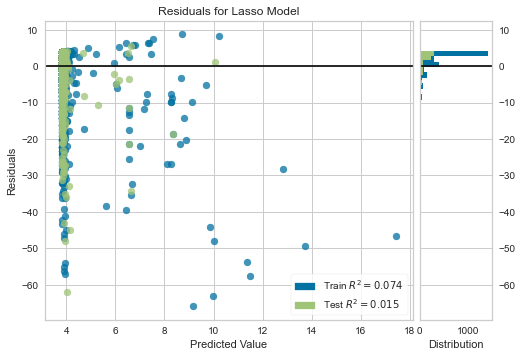

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = Lasso(alpha = 1.5)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [11]:
model.fit(X_train, y_train)
prediction = model.predict(X_test)
residual = abs(y_test - prediction)

residual.sort_values(ascending=False).head(20)

article_name
Lubusz Voivodeship          71.304746
Rosalyn Sussman Yalow       59.864165
Henry the Fowler            52.678853
Tuning fork                 44.051875
Mondragone                  42.304746
Merneptah                   40.457392
Umberto Nobile              34.783527
Warren County, Missouri     33.129075
Ádám Szalai                 31.832576
Šaštín-Stráže               26.935550
Bahrenborstel               26.304746
Australo-Melanesian         26.074093
Harlan Coben                25.717626
Góra                        25.159463
Lake Oswego, Oregon         25.041811
John Frederic Daniell       23.935550
Broken Arrow (1996 film)    23.812485
Dahlheim                    21.304746
Raposos                     20.304746
Charleston Open             19.897968
Name: lang_total_num_target, dtype: float64

In [20]:
diff_list = []
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    model = Lasso(alpha = 1.5)

    model.fit(X_train, y_train)  
    train_score = model.score(X_train, y_train)  
    test_score = model.score(X_test, y_test)
    diff = train_score - test_score
    diff_list.append(diff)
print(diff_list)

[0.030590165053654528, 0.04125434028602937, 0.017519508809132445, 0.03767430186772969, 0.03909830250650592, 0.035626223373834254, 0.0548665084592902, 0.04699246822810943, 0.04771168279817817, 0.056542161389751655, 0.07746648469796968, 0.045055423496880964, 0.03633690903019082, 0.07145479242156427, 0.06333208051886763, 0.04602626812186161, 0.054851884967323516, 0.05204524888498552, 0.06321955869789864, 0.05097598723778718, 0.05999589569974917, 0.011956937115491506, 0.009830477585001107, 0.04463044289894569, 0.02254878330512511, 0.07377245988130432, 0.05530600494395177, 0.05097112459099795, 0.06529668251104404, 0.08539185651396286]


In [21]:
print(sum(diff_list)/30)

0.048278032196437295
